# Projeto Indicium LightHouse

## Entendimento do negócio

A PProductions, um estúdio cinematográfico de Hollywood, contratou a Indicium para realizar um estudo de mercado baseado em dados de filmes. O objetivo estratégico é identificar padrões e fatores de sucesso que permitam orientar decisões sobre qual será o próximo filme a ser produzido, maximizando a expectativa de faturamento e garantindo boa aceitação do público.

Nesse contexto, é fundamental compreender não apenas os atributos básicos dos filmes, como gênero, elenco, direção e orçamento, mas também analisar métricas de engajamento e qualidade, como a nota do IMDB, número de votos e desempenho financeiro (faturamento).

O desafio envolve inferir possíveis tendências a partir de informações textuais, avaliando se é possível, por exemplo, prever o gênero de um filme a partir de sua descrição, ou mesmo estimar a nota do IMDB com base em características conhecidas.

Os principais objetivos do negócio neste projeto são fornecer recomendações sobre o tipo de filme que apresenta maior potencial de sucesso (financeiro e crítico), identificar os principais fatores que influenciam a alta expectativa de faturamento e aceitação de público, desenvolver um modelo preditivo capaz de estimar a nota do IMDB de um filme a partir de seus atributos, permitindo simulações de novos projetos.

Os critérios de sucesso serão geração de insights acionáveis para a equipe de desenvolvimento da PProductions, capazes de embasar decisões estratégicas sobre o próximo filme a ser produzido, entrega de um modelo preditivo funcional, capaz de estimar a nota do IMDB com precisão satisfatória, testado em exemplos reais.

Possíveis restrições:

- O banco de dados disponível contém informações históricas de filmes, mas pode não refletir integralmente tendências mais recentes do mercado. É possível (e encorajado) incorporar dados externos para enriquecer a análise.

- A definição de “sucesso” pode variar entre público e crítica, devendo-se considerar o equilíbrio entre retorno financeiro, engajamento e avaliação qualitativa.

- A previsão da nota do IMDB é um problema de regressão supervisionada, enquanto a inferência de gênero a partir do Overview se aproxima de um problema de classificação.

Métodologia utilizada durante o projeto: 

O CRISP-DM (Cross Industry Standard Process for Data Mining) é uma metodologia padrão para projetos de ciência de dados. Ele organiza o trabalho em seis etapas: entendimento do negócio, entendimento dos dados, preparação dos dados, modelagem, avaliação e implantação. Seu objetivo é guiar, de forma iterativa, o desenvolvimento de soluções baseadas em dados para problemas reais.

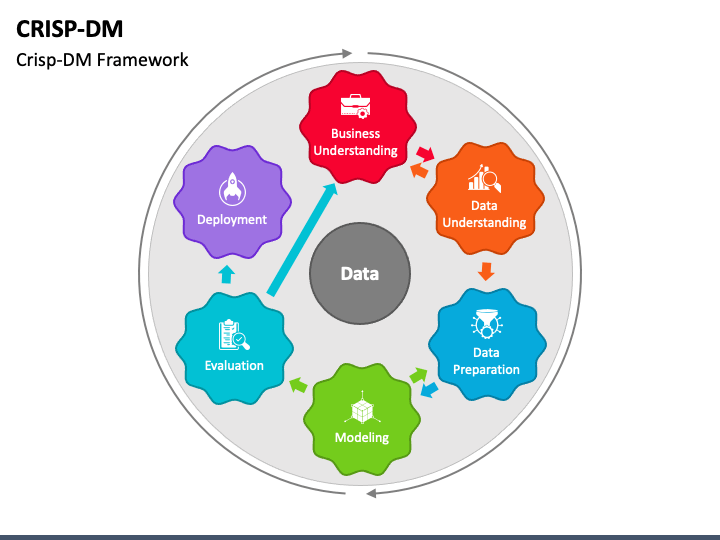




## Preparação do Dado

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 


In [527]:
df = pd.read_csv("desafio_indicium_imdb.csv")

In [528]:
df.shape

(999, 16)

In [529]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


**Verificando tipos de dados:**

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


**Verificando a existência de dados nulos:**

In [531]:
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

**Verificando a existência de dados duplicados:**

In [532]:
df[df.duplicated()]

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [533]:
df[df.Series_Title.duplicated()]

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
135,136,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


In [534]:
df[df.Series_Title == "Drishyam"]

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
86,87,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
135,136,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


Após uma avaliação inicial, verificou-se que o conjunto de dados apresenta boa qualidade, sem registros duplicados e com poucos valores nulos relevantes. As únicas intervenções necessárias são o ajuste do nome de uma coluna e a correção da tipagem de algumas variáveis, como, por exemplo, a coluna “Released\_Year”.

In [535]:
df = df.rename(columns = {"Unnamed: 0" : "Ranking"})

In [536]:
mask_invalid = ~df["Released_Year"].str.isnumeric()
print(df.loc[mask_invalid, "Released_Year"].unique())

['PG']


In [537]:
df = df[df["Released_Year"].str.isnumeric()]
df["Released_Year"] = df["Released_Year"].astype(int)

In [538]:
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False).astype(int)


In [539]:
df['Gross'] = df['Gross'].str.replace(',', '', regex=False).astype(float)

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ranking        998 non-null    int64  
 1   Series_Title   998 non-null    object 
 2   Released_Year  998 non-null    int64  
 3   Certificate    897 non-null    object 
 4   Runtime        998 non-null    int64  
 5   Genre          998 non-null    object 
 6   IMDB_Rating    998 non-null    float64
 7   Overview       998 non-null    object 
 8   Meta_score     841 non-null    float64
 9   Director       998 non-null    object 
 10  Star1          998 non-null    object 
 11  Star2          998 non-null    object 
 12  Star3          998 non-null    object 
 13  Star4          998 non-null    object 
 14  No_of_Votes    998 non-null    int64  
 15  Gross          829 non-null    float64
dtypes: float64(3), int64(4), object(9)
memory usage: 132.5+ KB


In [541]:
df.head()

,Ranking,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


## Entendimento do Dado (EDA)

In [487]:
df.head()

,Ranking,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [488]:
df.describe()

,Ranking,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,998.000000,998.000000,998.000000,841.000000,9.980000e+02,8.290000e+02
mean,499.533066,1991.214429,122.854709,7.948297,77.970273,2.716239e+05,6.795500e+07
std,288.297542,23.308539,28.110078,0.272203,12.390581,3.210735e+05,1.098123e+08
min,1.000000,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,250.250000,1976.000000,103.000000,7.700000,70.000000,5.541675e+04,3.237118e+06
50%,499.500000,1999.000000,119.000000,7.900000,79.000000,1.381685e+05,2.338399e+07
75%,748.750000,2009.000000,136.750000,8.100000,87.000000,3.735062e+05,8.050000e+07
max,999.000000,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


**Correlação entre as variaáveis do dataset**

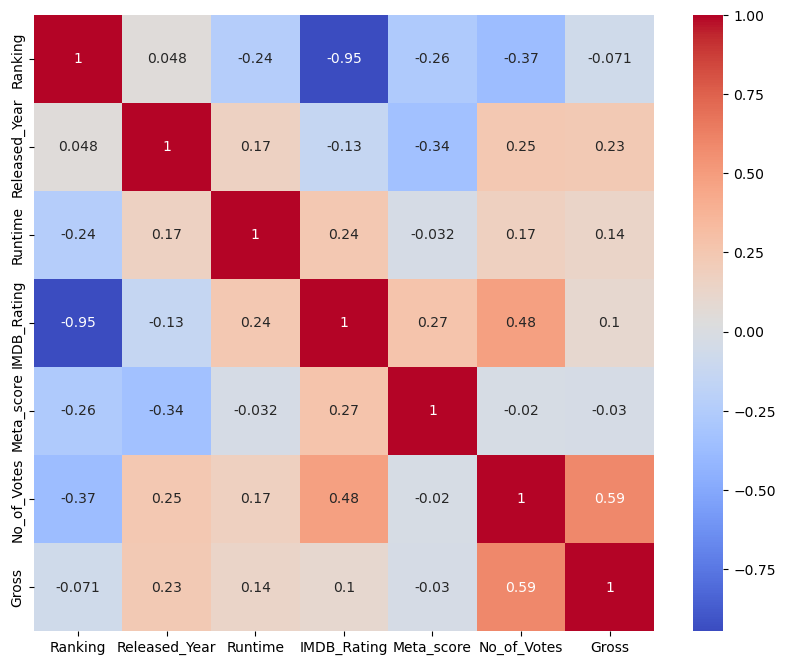

In [489]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

As correlações indicam padrões interessantes entre as variáveis numéricas do conjunto de dados. O Ranking apresenta uma correlação muito forte e negativa com a nota do IMDB, o que é esperado, já que rankings normalmente são ordenados a partir dessas notas, quanto maior a nota, melhor a posição. Por isso, o Ranking não deve ser usado como variável preditora da futura predição a ser feita. Já o número de votos (No_of_Votes) mostra uma correlação moderada e positiva com a nota do IMDB, indicando que filmes mais populares tendem a ter avaliações um pouco mais altas, mas não necessariamente é uma relação causal, pois um filme muito votado pode ser mediano, apenas mais conhecido. O Meta_score, que reflete a crítica especializada, tem correlação positiva, porém baixa com a nota do IMDB, sugerindo que o público e a crítica convergem apenas parcialmente nas suas avaliações.

Outros fatores têm correlações fracas, como por exemplo, a bilheteria (Gross) tem pouca relação direta com a nota, mas está relativamente associada ao número de votos, o que faz sentido, já que filmes com mais público arrecadam mais. O tempo de duração (Runtime) mostra uma correlação fraca e positiva com a nota, o que pode indicar que filmes ligeiramente mais longos tendem a ter melhores avaliações, talvez por desenvolverem melhor suas histórias. O ano de lançamento (Released_Year) se relaciona levemente de forma negativa com a nota, sugerindo que filmes mais antigos têm, em média, notas um pouco melhores, o que pode refletir a presença de clássicos no conjunto de dados. 

### Volume de filmes e renda

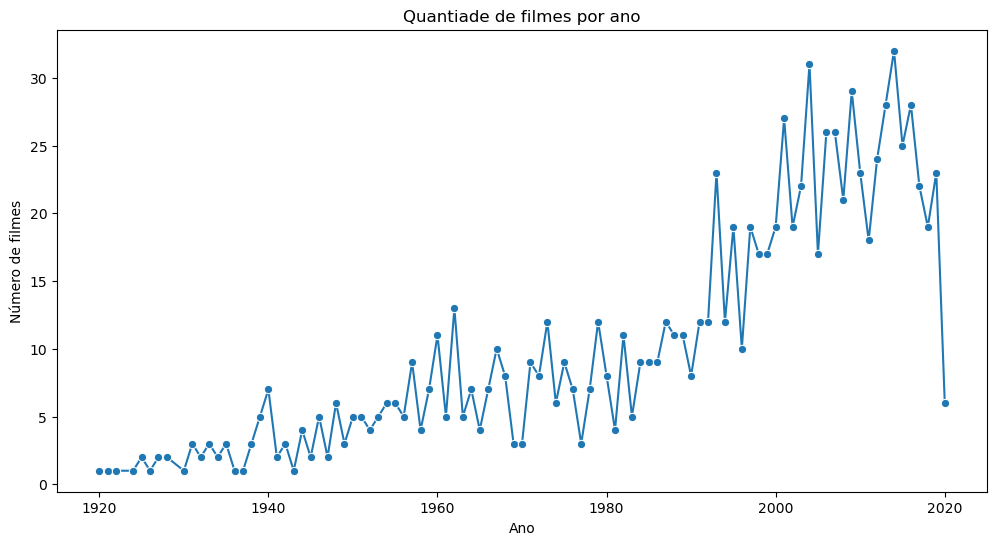

In [443]:
plt.figure(figsize=(12, 6))
filmes_por_ano= df['Released_Year'].value_counts().sort_index()
sns.lineplot(x=filmes_por_ano.index, y=filmes_por_ano.values, marker='o')
plt.title('Quantiade de filmes por ano')
plt.xlabel('Ano')
plt.ylabel('Número de filmes')
plt.show()

 - Há uma clara tendência de crescimento no número de filmes lançados por ano, especialmente a partir da década de 1980.

- Um pico notável ocorre entre 2005 e 2015, quando o número de lançamentos anuais atinge seu ponto mais alto.

- Os primeiros anos (antes de 1950) apresentam uma taxa de produção baixa, provavelmente devido às limitações tecnológicas da época, públicos menores e um número menor de estúdios de produção comparado com os dias atuais.

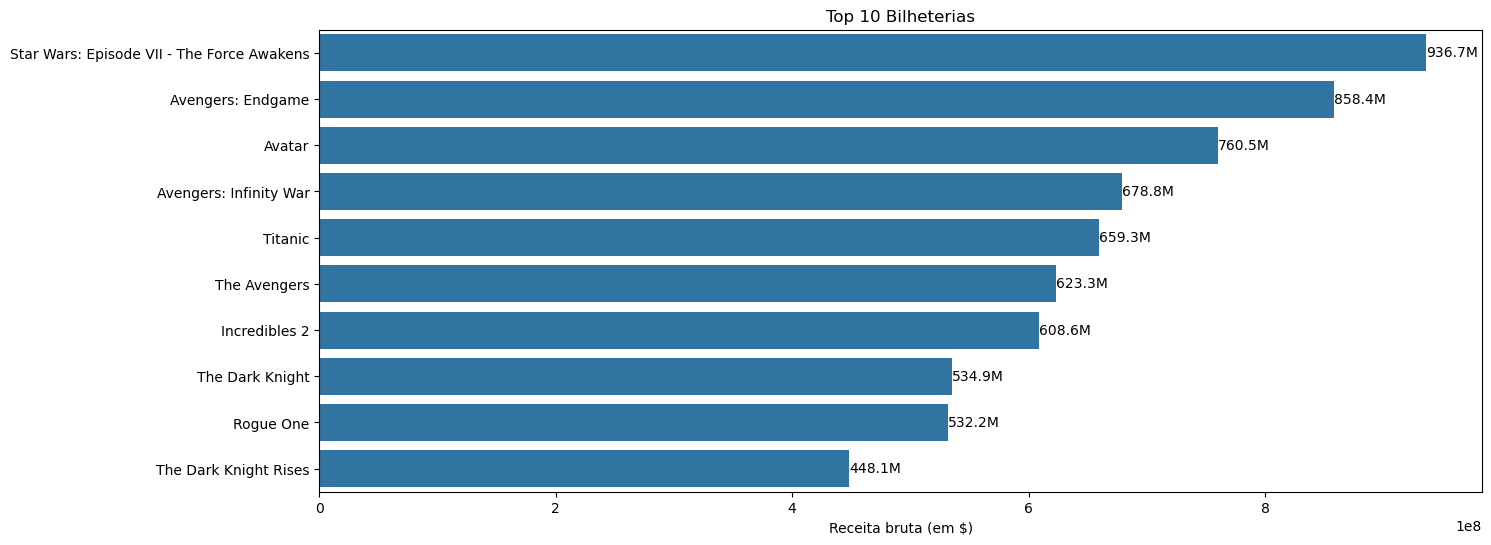

In [444]:
renda = df.sort_values(by='Gross', ascending=False).head(10)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Gross', y='Series_Title', data=renda)

plt.title('Top 10 Bilheterias')
plt.xlabel('Receita bruta (em $)')
plt.ylabel('')

for p in ax.patches:
    width = p.get_width()          
    y = p.get_y() + p.get_height()/2
    plt.text(width, y, f'{width/1_000_000:.1f}M', va='center')

plt.show()

- O filme com a maior bilheteria na lista é o Star Wars: Episode VII, com mais de US$ 900 milhões.

- Os filmes Marvel (MCU) dominam a lista, com 4 dos 10 filmes de maior bilheteria: Avengers: Endgame, Avengers: Infinity War, The Avengers e Black Panther

- Os filmes de James Cameron (Avatar e Titanic) são grandes sucessos de bilheteria, mantendo-se entre os primeiros mesmo sendo os mais antigos entre os 10.

- Os Incríveis 2 mostram o grande potencial comercial dos filmes de animações.

- A Trilogia do Cavaleiro das Treavas também tem presença marcante, com The Dark Knight e The Dark Knight Rises, mais filmes de herois como blockbusters.



### Melhore filmes

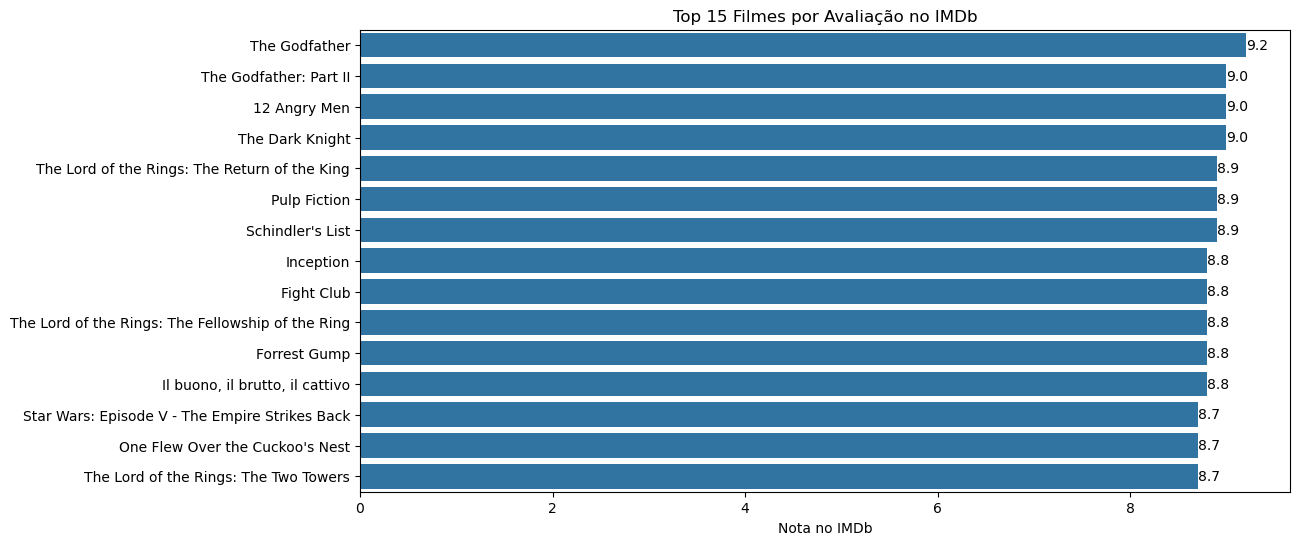

In [445]:
top_rated_movies = df.sort_values(by='IMDB_Rating', ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_rated_movies, x='IMDB_Rating', y='Series_Title')

# Título e eixos traduzidos
plt.title('Top 15 Filmes por Avaliação no IMDb')
plt.xlabel('Nota no IMDb')
plt.ylabel('')

# Coloca o valor no final da barra
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    plt.text(width, y, f'{width:.1f}', va='center')  # uma casa decimal

plt.show()


- The Shawshank Redemption lidera com a maior nota no IMDb desta lista
- O Poderoso Chefão e sua sequência (O Poderoso Chefão: Parte II) estão ambos no top 5, reforçando seu status de clássicos e grandes obras-primas do cinema.
- The Dark Knight se destaca como filme de super-herói com melhor avaliação, o que indica o reconhecimento da crítica e do público
- Filmes como Pulp Fiction e Clube da Luta também são clássicos populares e também são obras que se tornaram "cult".
- O Senhor dos Anéis: O Retorno do Rei, nesta lista, representa o gênero de fantasia, épico e efeitos visuais impressionantes.

**Top 15 anos por avaliação no IMDb**

In [446]:
df.groupby("Released_Year")["IMDB_Rating"].mean().sort_values(ascending = False).head(15)

Released_Year
1936    8.500000
1921    8.300000
1957    8.277778
1942    8.233333
1931    8.200000
1924    8.200000
1927    8.200000
1954    8.166667
1994    8.150000
1941    8.150000
1950    8.140000
2020    8.133333
1958    8.100000
1937    8.100000
1920    8.100000
Name: IMDB_Rating, dtype: float64

Os dados mostram que alguns dos filmes mais bem avaliados no IMDb foram lançados há muitas décadas, incluindo as décadas de 1920, 1930, 1940 e 1950, com médias de avaliação superiores a 8.0. Isso sugere que a qualidade cinematográfica não está necessariamente ligada ao avanço tecnológico ou ao tamanho atual da indústria, mas sim à força da narrativa, ao impacto cultural e à forma como esses filmes ressoam emocionalmente com o público ao longo do tempo. Outro ponto que pode-se destacar é também aparecem anos mais recentes, como 1994 e 2020, indicando que, mesmo em uma indústria altamente competitiva e saturada, ainda é possível criar obras que atingem um nível de excelência comparável aos clássicos, mostrando que o bom cinema não está estagnado.

### Por gênero

In [447]:
generos = (
    df['Genre']
    .str.split(',')        
    .explode()             
    .str.strip()          
    .value_counts()        
    .to_dict()              
)

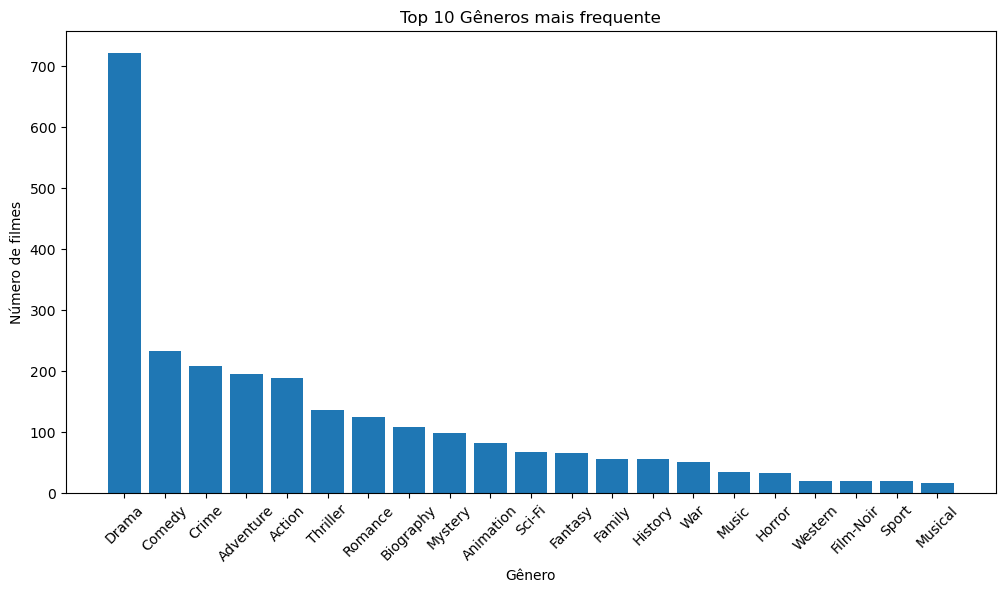

In [448]:
# Counting the most frequent genres
plt.figure(figsize=(12, 6))
plt.bar(list(generos.keys()), list(generos.values()))
plt.title('Top 10 Gêneros mais frequente')
plt.xlabel('Gênero')
plt.ylabel('Número de filmes')
plt.xticks(rotation = 45)
plt.show()

O gênero drama é o mais comum, com mais de 700 filmes, mostrando que é versátil e que pode agradar a muitos tipos de público. Em seguida vêm comédia, aventura, crime e ação, com mais de 200 filmes cada, o que indica que o público gosta bastante de histórias divertidas e cheias de emoção.

Já suspense, romance, biografia e mistério aparecem em quantidade média, normalmente combinados com outros gêneros para criar narrativas diferentes. Film-noir, musical, faroeste e esportes são os menos frequentes, possivelmente por serem de generos mais nichados ou terem perdido popularidade com o tempo. No geral, a grande variedade de gêneros mostra que o cinema busca agrada diferentes gostos, mas o drama continua sendo o mais presente em quase tudo.

**Imdb médio por gênero**

In [449]:
media_por_genero 

Genre
War          8.013725
Western      8.000000
Film-Noir    7.989474
Sci-Fi       7.977612
Mystery      7.967677
History      7.960000
Drama        7.958033
Crime        7.954545
Adventure    7.953846
Action       7.948677
Musical      7.947059
Biography    7.935780
Fantasy      7.931818
Animation    7.930488
Sport        7.926316
Romance      7.925600
Music        7.914286
Family       7.912500
Thriller     7.909489
Comedy       7.903433
Horror       7.887500
Name: IMDB_Rating, dtype: float64

- Gêneros de maior média de avaliação como Guerra, Western e Film-Noir aparecem no topo, mostrando que, embora menos produzidos, costumam ter alta qualidade ou impacto crítico.

- Ficção científica (Sci-Fi) e Mistério também têm notas altas, indicando que boas histórias nesses gêneros são muito valorizadas pelo público.

- Drama, Crime e Aventura ficam na faixa intermediária alta, sugerindo consistência: são muito populares, mas a variedade de títulos gera médias um pouco menores.

- Comédia, Terror e Música aparecem nas últimas posições, o que pode refletir uma maior variação na qualidade ou preferências mais pessoais, por exemplo, filmes terror tendem a dividir opiniões.

- O padrão geral mostra que gêneros menos comuns muitas vezes recebem notas mais altas, possivelmente por atraírem projetos mais cuidadosos, enquanto gêneros muito produzidos (como Comédia) acabam com médias mais baixas pela quantidade e diversidade de qualidade.

### Diretores

/tmp/ipykernel_520152/4201900028.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_gross.values, y=director_gross.index, palette='rocket', ax=axes[0])
/tmp/ipykernel_520152/4201900028.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='inferno', ax=axes[1])


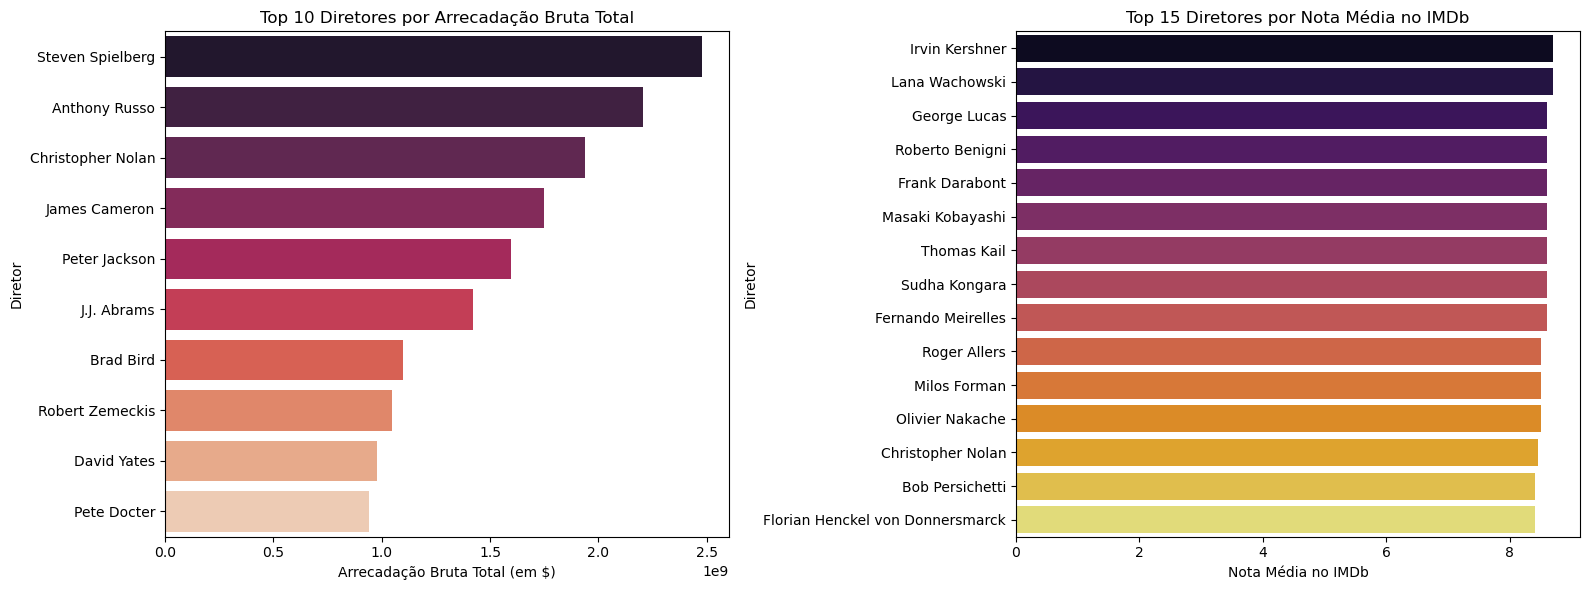

In [450]:
# Dados
director_gross = df.groupby('Director')['Gross'].sum().nlargest(10)
top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(15)

# Criando figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 10 Diretores por Arrecadação Bruta
sns.barplot(x=director_gross.values, y=director_gross.index, palette='rocket', ax=axes[0])
axes[0].set_title('Top 10 Diretores por Arrecadação Bruta Total')
axes[0].set_xlabel('Arrecadação Bruta Total (em $)')
axes[0].set_ylabel('Diretor')

# Gráfico 2: Top 15 Diretores por Nota Média no IMDb
sns.barplot(x=top_directors.values, y=top_directors.index, palette='inferno', ax=axes[1])
axes[1].set_title('Top 15 Diretores por Nota Média no IMDb')
axes[1].set_xlabel('Nota Média no IMDb')
axes[1].set_ylabel('Diretor')

plt.tight_layout()
plt.show()


- Steven Spielberg lidera em termos de bilheteria, com ganhos próximos a US$ 2,5 bilhões, destacando seu sucesso consistente em blockbusters.

- Anthony Russo e Christopher Nolan seguem de perto, mostrando que conseguem manter alta performance financeira. Nolan também se destaca por sua consistência na qualidade dos filmes, recebendo altas avaliações médias no IMDb.

- Diretores como James Cameron e Peter Jackson mantêm posições fortes graças a franquias globais de sucesso (Avatar, O Senhor dos Anéis), enquanto nomes clássicos como Charles Chaplin e Francis Ford Coppola continuam influentes, evidenciando o impacto duradouro de filmes clássicos.

- Após os cinco primeiros, os ganhos diminuem, mas diretores como J.J. Abrams, Brad Bird e Robert Zemeckis ainda apresentam resultados relevantes. Lana Wachowski e Irvin Kershner aparecem de forma surpreendente no ranking de qualidade, provavelmente pelo envolvimento em franquias icônicas (Matrix e Star Wars).

- Pete Docter, Roger Allers e Bob Persichetti representam o sucesso das animações, com filmes aclamados pela crítica (Divertida Mente, O Rei Leão, Homem-Aranha: No Aranhaverso), mostrando que animação também combina impacto crítico e sucesso financeiro.

### Atores

In [451]:
actors_df = df.melt(id_vars='IMDB_Rating', value_vars=['Star1','Star2','Star3'],
                    value_name='Actor').drop('variable', axis=1)

mean_rating_per_actor = actors_df.groupby('Actor')['IMDB_Rating'].mean().sort_values(ascending=False)

print(mean_rating_per_actor.head(10))

Actor
Aaron Eckhart       9.0
John Travolta       8.9
Gary Sinise         8.8
Meat Loaf           8.8
Elliot Page         8.8
Eli Wallach         8.8
Elijah Wood         8.8
Lilly Wachowski     8.7
Michael Berryman    8.7
Keanu Reeves        8.7
Name: IMDB_Rating, dtype: float64


- Aaron Eckhart lidera entre os atores com maior média de avaliações IMDb, atingindo 9.0, destacando seu impacto no filme do Cavaleiros da Trevas.

- John Travolta aparece em segundo, com 8.9, reafirmando sua presença duradoura em várias produções de sucesso.

- Gary Sinise, Meat Loaf, Elliot Page, Eli Wallach, Elijah Wood se destacam com médias de 8.8, mostrando que tanto atores clássicos quanto contemporâneos conseguem desempenhos consistentes em filmes aclamados.

- Lilly Wachowski, Michael Berryman e Keanu Reeves, com notas entre 8.7 e 8.8, reforçam a diversidade de talentos que conquistam público e crítica, abrangendo diferentes gêneros e épocas do cinema.

- No geral, o ranking evidencia que atores de diferentes gerações e estilos têm potencial para protagonizar filmes clássicos ou recentes.

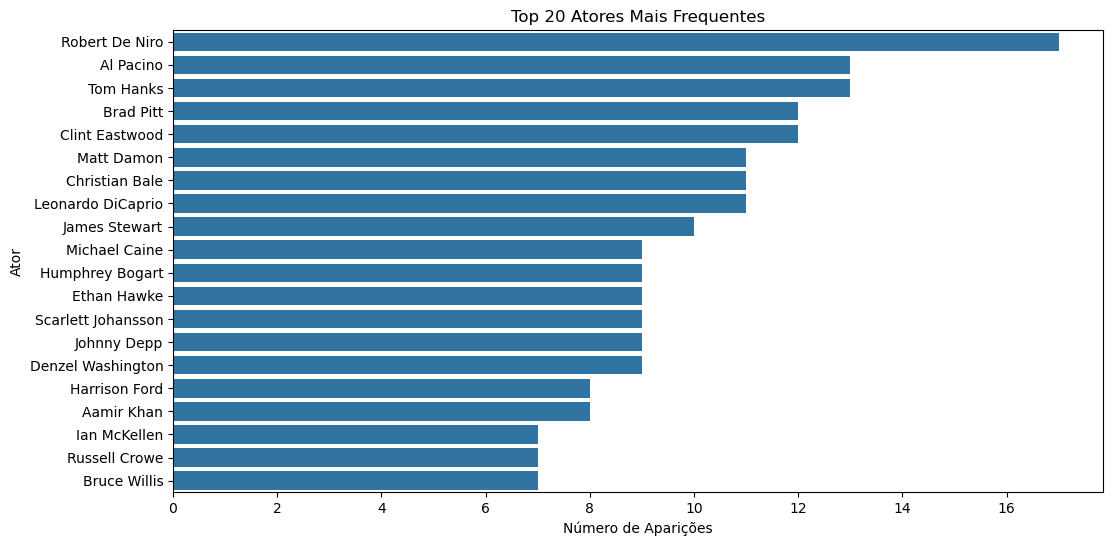

In [452]:
# Junta todas as colunas de atores e conta as aparições
top_actors = (
    df[['Star1','Star2','Star3','Star4']]
    .melt(value_name='Actor')['Actor']
    .value_counts()
    .head(20)
)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 20 Atores Mais Frequentes')
plt.xlabel('Número de Aparições')
plt.ylabel('Ator')
plt.show()


- Robert De Niro lidera com mais de 17 filmes, mostrando sua longa carreira e versatilidade.

- Tom Hanks (14) e Al Pacino (13) seguem de perto, destacando sua participação consistente em filmes aclamados.

- Brad Pitt (12) e Leonardo DiCaprio (11) refletem colaborações frequentes com diretores renomados e projetos de destaque.

- Scarlett Johansson é a atriz mais frequente com 9 filmes, demonstrando presença forte em diversos gêneros.

- Christian Bale (11) se destaca por papéis transformadores em filmes de sucesso e produções independentes.

- A lista inclui atores de franquias de ação e aventura como o Harrison Ford, Tom Cruise e Bruce Willis

- Veteranos como Morgan Freeman e Ian McKellen mostram popularidade duradoura ao longo das décadas.

### Qual filme você recomendaria para uma pessoa que você não conhece?

Pensando que eu poderia ser apenas arbitrário e falar um filme da minha preferência eu pensei que poderia utilizar os próprios dados para dar uma recomendação. Com isso em mente, decidi utilizar uma análise multicritperio simples para selecionar uma recomendação mais generalista, pois o público alvo não foi espeficado. 

 - Tem que ser um filme bem avalido
 - Não pode ser um filme muito antigo (no geral as pessoas não gostam de filmes preto e branco e nem muito antigos)
 - Não ser um filme muito longo (mais chato de acompanhar)
 - Ter bons atores
 - Ser de um gênero mais comum nada muito cult

Baseado nesses critérios, selecionei os pesos para cada:


In [453]:

pesos = {
    'IMDB_norm': 0.3,
    'Year_norm': 0.4,
    'Runtime_norm': 0.1,
    'Actor_norm': 0.1,
    'Genre_norm': 0.1
}

eu poderia alterar os pesos de acordo com a preferência do publico a qual eu recomendaria 

In [454]:
df['IMDB_normalizado'] = (df['IMDB_Rating'] - df['IMDB_Rating'].min()) / (df['IMDB_Rating'].max() - df['IMDB_Rating'].min())
df['Year_normalizado'] = (df['Released_Year'] - df['Released_Year'].min()) / (df['Released_Year'].max() - df['Released_Year'].min())
# Normaliza o Runtime (quanto menor, melhor)
df['Runtime_normalizado'] = 1 - (df['Runtime'] - df['Runtime'].min()) / (df['Runtime'].max() - df['Runtime'].min())

# Cria a pontuação para os atores (média do IMDB dos atores)
actor_cols = ['Star1','Star2','Star3','Star4']
actor_scores = df[actor_cols].apply(lambda x: x.map(lambda a: df[df['Star1']==a]['IMDB_Rating'].mean() if a in df['Star1'].values else 0), axis=1)
df['Actor_normalizado'] = (actor_scores.mean(axis=1) - actor_scores.mean(axis=1).min()) / (actor_scores.mean(axis=1).max() - actor_scores.mean(axis=1).min())

# Cria a pontuação para os gêneros mais comuns
generos = df['Genre'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
generos_mais_comuns = generos.head(5).index.tolist()




In [455]:
def genre_score(genres):
    genres_list = [g.strip() for g in genres.split(',')]
    score = sum([1 for g in genres_list if g in generos_mais_comuns ])
    return score / len(generos_mais_comuns )  # normaliza entre 0 e 1



In [456]:
df['Genre_normalizado'] = df['Genre'].apply(genre_score)
df['Final_Score'] = (
    df['IMDB_normalizado'] * weights['IMDB_norm'] +
    df['Year_normalizado'] * weights['Year_norm'] +
    df['Runtime_normalizado'] * weights['Runtime_norm'] +
    df['Actor_normalizado'] * weights['Actor_norm'] +
    df['Genre_normalizado'] * weights['Genre_norm']
)

recomendacao = df.sort_values('Final_Score', ascending=False).head(10)
recomendacao[['Series_Title','Released_Year','IMDB_Rating','Runtime','Genre','Final_Score']]

,Series_Title,Released_Year,IMDB_Rating,Runtime,Genre,Final_Score
1,The Dark Knight,2008,9.0,152,"Action, Crime, Drama",0.748490
7,Inception,2010,8.8,148,"Action, Adventure, Sci-Fi",0.731635
58,Avengers: Endgame,2019,8.4,181,"Action, Adventure, Drama",0.731493
4,The Lord of the Rings: The Return of the King,2003,8.9,201,"Action, Adventure, Drama",0.727238
59,Avengers: Infinity War,2018,8.4,149,"Action, Adventure, Sci-Fi",0.720283
5,Pulp Fiction,1994,8.9,154,"Crime, Drama",0.720257
19,Soorarai Pottru,2020,8.6,153,Drama,0.704668
35,The Prestige,2006,8.5,130,"Drama, Mystery, Sci-Fi",0.697336
18,Gisaengchung,2019,8.6,132,"Comedy, Drama, Thriller",0.693973
12,The Lord of the Rings: The Two Towers,2002,8.7,179,"Action, Adventure, Drama",0.693709


Segundo os critérios selecionados, o melhor filme para recomendar seria The Dark Knight. Porém, como filmes de super-heróis ainda encontram certa resistência por parte de algumas pessoas, **minha recomendação é Inception**, que ficou em segundo lugar na análise multicritério.

### Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?


Sim! A coluna Overview pode fornecer insights bastante valiosos, e é possível tentar inferir o gênero do filme a partir dela usando técnicas de Processamento de linguagem natural.


1. Insights que podem ser extraídos: 

- Principais temas e tópicos: Palavras-chave na sinopse podem indicar o foco do filme, como “amor”, “viagem no tempo”, “investigação” ou “guerra”, ou até mesmo termos como “detetive”, “espaço”, “zumbis” podem sinalizar o tipo de enredo, ação ou cenário. Através de uma técnica reconhecimentos de entidades é possível identificar esses tópicos.

- Tom e estilo: O vocabulário e a construção das frases podem dar pistas sobre se o filme é mais sério, humorístico, tenso ou leve, realizando uma análise de sentimentos

- Popularidade e atratividade: Filmes com sinopses mais detalhadas ou chamativas podem atrair mais público? É possível estudar essa relação baseado no número e votos e no nota do IMDB

- Possíveis clusters: Ao transformar o texto em vetores, é possível agrupar filmes por similaridade de conteúdo, identificando padrões de narrativa.

2. Inferir gênero a partir da sinopse

É possível, mas não é 100% garantido. Algumas abordagens comuns:

Bag-of-Words / TF-IDF: Representar cada resumo como um vetor de palavras e treinar um modelo de classificação (como Random Forest, Gradient Boosting, XGBoost ou até redes neurais)para prever o gênero.

Word embeddings: Usar representações mais sofisticadas (Word2Vec, GloVe, BERT) para capturar o contexto das palavras e melhorar a acurácia na classificação de gênero.

LLM: É possível utilizar grandes modelos de linguagem, como os da OPENAI via API para prever o gênero baseado no Overview, seria um método avançado e mais custoso mas talvez com acurárica maior.

## Modelagem

Seguindo o CRISP-DM, após entender o problema de negócio e checar a qualidade dos dados, é necessário, antes da modelagem, realizar a preparação do conjunto de dados, pois alguns modelos não lidam bem com dados ausentes ou com variáveis não numéricas.

### Preparação 

**Tratando os nulos**

In [542]:
df.isnull().sum()

Ranking            0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [543]:
df['Certificate'].value_counts()

Certificate
U           233
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

In [544]:
df['Certificate'] = df['Certificate'].fillna('U')

In [545]:
df['Decade'] = (df['Released_Year'] // 10) * 10
df['Gross'] = df.groupby('Decade')['Gross'].transform(lambda x: x.fillna(x.median()))

In [546]:
median_by_genre = df.assign(Genre=df['Genre'].str.split(',').str[0].str.strip()) \
                    .groupby('Genre')['Meta_score'].median()

df['Meta_score'] = df.apply(
    lambda row: median_by_genre.get(row['Genre'].split(',')[0].strip(), df['Meta_score'].median()) 
                if pd.isna(row['Meta_score']) else row['Meta_score'], axis=1
)


**Encoding**

In [547]:
generos = df['Genre'].astype(str).str.get_dummies(sep=',')

certificates = pd.get_dummies(df['Certificate'], prefix='Certificate', drop_first=True)

directors = df['Director'].value_counts().head(50).index
df['Director_Mod'] = df['Director'].apply(lambda x: x if x in directors  else 'Other')
directors = pd.get_dummies(df['Director_Mod'], prefix='Director', drop_first=True)

df_encoded = pd.concat([df.drop(columns=['Genre','Certificate','Director','Director_Mod', 'Ranking', 'Series_Title', 'Overview','Star1', 'Star2', 'Star3','Star4','Decade']), 
                        generos, certificates, directors], axis=1)



In [548]:
df_encoded.shape

(998, 105)

In [549]:
df_encoded = df_encoded.dropna()

### Modelo

Como trata-se de um problema de regressão, pois o objetivo é prever um valor numérico contínuo: a nota do IMDb de cada filme. Para isso, utilizei principalmente variáveis numéricas que pudessem fornecer informações diretas sobre a avaliação, descartando algumas colunas que poderiam introduzir ruído ou overfitting:

**Variáveis excluídas:**

- Genre, Certificate: poucos gêneros ou categorias e melhor tratados via encoding.

- Director, Director_Mod: muitos valores únicos, poderiam causar overfitting.

- Ranking: já refletia parcialmente a avaliação geral.

- Series_Title, Overview: não agregam informação direta para os modelos.

- Star1, Star2, Star3, Star4: muitos atores (~500) para apenas 1000 filmes, risco de overfitting.

- Decade: redundante com Released_Year.

**Transformações aplicadas:**

- Converti Runtime de string (“142 min”) para inteiro (142).

- Encoding de Genre para transformar em variável numérica.

- Conversão de Gross de string para float, removendo vírgulas e símbolos monetários.

- Tratamento de valores ausentes (NaNs), substituindo ou removendo conforme necessário.

- Garantia de que todas as colunas utilizadas fossem numéricas, adequadas para modelos de boosting e bagging.


Essas etapas garantem que modelos como Gradient Boosting e Random Forest possam ser treinados sem problemas, com dados consistentes e otimizados para previsão da nota do IMDb.

In [550]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

X = df_encoded.drop(columns=['IMDB_Rating'])
y = df_encoded['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [551]:
# Lista de modelos
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose=-1),
    "CatBoost": CatBoostRegressor(iterations=200, learning_rate=0.05, verbose=0, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05, random_state=42)
}

In [552]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

In [553]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(drop=True, inplace=True)


## Avaliação

In [554]:
results_df

,Model,RMSE,R2
0,XGBoost,0.171485,0.594128
1,HistGradientBoosting,0.175579,0.574516
2,CatBoost,0.175602,0.574402
3,Random Forest,0.177985,0.562774
4,LightGBM,0.178823,0.558647
5,Gradient Boosting,0.178885,0.558339
6,Extra Trees,0.181195,0.546862
7,Decision Tree,0.254389,0.106827


- **Melhor desempenho geral:**
**O XGBoost** se destaca, com o menor **RMSE (0.1715)** e o maior **R² (0.5941)**, mostrando que é o modelo que melhor se aproxima dos valores reais de avaliação do IMDb. O XGBoost apresenta um excelente desempenho em problemas de regressão com dados heterogêneos, lidando bem com variáveis numéricas e categóricas quando devidamente pré-processadas. Sua regularização incorporada ajuda a reduzir o risco de overfitting, tornando-o um modelo robusto para previsões complexas. Por outro lado, é mais complexo e computacionalmente pesado, podendo exigit ajustes cuidadosos de hiperparâmetros (que não foi realizado aqui) para alcançar o desempenho máximo. Além disso, pode ser sensível a dados muito ruidosos ou inconsistentes, o que exige atenção no pré-processamento e limpeza do conjunto de dados.
Em seguida, temos o HistGradientBoosting e o CatBoost, com desempenho muito próximo, indicando que modelos de boosting geralmente se saem melhor em problemas de regressão com variáveis numéricas e categóricas codificadas. 

- Modelos de ensemble tradicionais:
O Random Forest e o Gradient Boosting padrão também apresentam resultados sólidos, mas ficam um pouco atrás dos modelos mais recentes de boosting (XGBoost, HistGradientBoosting, CatBoost).

- Modelos mais simples:
A Decision Tree isolada tem desempenho bem inferior (RMSE de 0.254 e R² de 0.107), mostrando que árvores únicas tendem a sofrer overfitting e não capturam bem a complexidade do problema.

**Medidas de performance escolhidas**

- RMSE (Root Mean Squared Error): mede o erro médio da previsão em unidades originais da nota do IMDb. É útil porque penaliza erros grandes de forma mais severa, sendo sensível a predições muito distantes do valor real.

- R² (Coeficiente de Determinação): indica a proporção da variabilidade da variável alvo explicada pelo modelo. Um R² próximo de 1 significa que o modelo captura bem a tendência dos dados.

Ambas foram escolhidas para complementar: RMSE mostra o erro absoluto médio, enquanto R² mostra a capacidade explicativa do modelo.





## Previsão

Supondo o seguinte filme:

In [574]:
new_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

**Processando os dados do novo filme**

In [585]:
novo_df = pd.DataFrame([new_movie])
novo_df['Gross'] = novo_df['Gross'].str.replace(',','').astype(float)
novo_df['Runtime'] = novo_df['Runtime'].str.replace(' min','').astype(int)

In [586]:
novo_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0


**Encoding das variaveis categóricas**

In [590]:
top_directors = df_encoded.filter(like='Director_').columns.str.replace('Director_','')
novo_df['Director_Mod'] = movie_df['Director'].apply(lambda x: x if x in top_directors else 'Other')


generos_dummies = novo_df['Genre'].str.get_dummies(sep=',')
certificate_dummies = pd.get_dummies(novo_df['Certificate'], prefix='Certificate', drop_first=True)
diretores_dummies = pd.get_dummies(novo_df['Director_Mod'], prefix='Director', drop_first=True)

# Garantir que todas as colunas existam como no dataset de treino
for col in df_encoded.drop(columns=['IMDB_Rating']).columns:
    if col not in generos_dummies.columns and col not in certificate_dummies.columns and col not in diretores_dummies.columns:
        movie_df[col] = 0

In [592]:
X_new = pd.concat([novo_df.drop(columns=['Series_Title','Genre','Certificate','Director','Director_Mod','Overview',
                                          'Star1','Star2','Star3','Star4']),
                   genre_dummies, certificate_dummies, director_dummies], axis=1)


X_new = X_new.reindex(columns=X_train.columns, fill_value=0)

In [593]:
predicted_rating = models["Gradient Boosting"].predict(X_new)[0]
print(f"Nota prevista do IMDB: {predicted_rating:.2f}")

Nota prevista do IMDB: 8.80


### Salvando o modelo

In [594]:
import pickle
gb_model = models["Gradient Boosting"]


with open("gradient_boosting_model.pkl", "wb") as f:
    pickle.dump(gb_model, f)